In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn import linear_model

# 1. 주가데이터 회귀분석

## 1. 데이터 불러오기

In [91]:
# 데이터 불러오기
h_stock= pd.read_csv('./data/H_stock.csv') # h회사 
s_stock= pd.read_csv('./data/S_stock.csv') # s회사
k_index= pd.read_csv('./data/K_index.csv') # 코스피

print(h_stock)
print(s_stock)
print(k_index)

           date  h_price  h_rate
0    2015-03-25    45500     NaN
1    2015-03-26    45900   0.879
2    2015-03-27    45000  -1.961
3    2015-03-30    45600   1.333
4    2015-03-31    46000   0.877
..          ...      ...     ...
244  2016-03-21    60100   0.839
245  2016-03-22    59200  -1.498
246  2016-03-23    58900  -0.507
247  2016-03-24    59300   0.679
248  2016-03-25    59300   0.000

[249 rows x 3 columns]
           date  s_price  s_rate
0    2015-03-25  1485000     NaN
1    2015-03-26  1421000  -4.310
2    2015-03-27  1421000   0.000
3    2015-03-30  1428000   0.493
4    2015-03-31  1441000   0.910
..          ...      ...     ...
244  2016-03-21  1267000  -0.471
245  2016-03-22  1269000   0.158
246  2016-03-23  1279000   0.788
247  2016-03-24  1282000   0.235
248  2016-03-25  1288000   0.468

[249 rows x 3 columns]
           date    kospi  k_rate
0    2015-03-25  2042.81     NaN
1    2015-03-26  2022.56  -0.991
2    2015-03-27  2019.80  -0.136
3    2015-03-30  2030.04   0

In [92]:
print(h_stock.info())
print(s_stock.info())
print(k_index.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     249 non-null    object 
 1   h_price  249 non-null    int64  
 2   h_rate   248 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     249 non-null    object 
 1   s_price  249 non-null    int64  
 2   s_rate   248 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    249 non-null    object 
 1   kospi   249 non-null    float64
 2   k_rate  248 non-null 

In [98]:
# NaN 제거 및 자료변환
h_rate = np.array(h_stock.h_rate.values[1:]).reshape(-1)
s_rate = np.array(s_stock.s_rate.values[1:]).reshape(-1)
k_rate = np.array(k_index.k_rate.values[1:]).reshape(-1,1)

In [106]:
h_rate.shape, s_rate.shape, k_rate.shape

((248,), (248,), (248, 1))

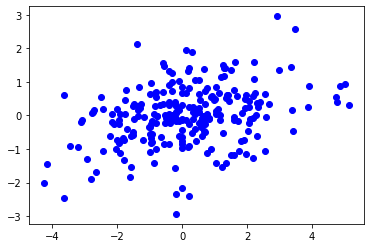

In [100]:
plt.scatter(h_rate, k_rate, color='blue')
plt.show()

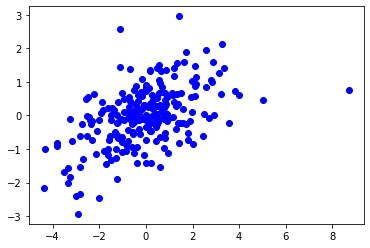

In [110]:
plt.scatter(s_rate, k_rate, color='blue')
plt.show()

## 2. 모델링

In [101]:
# k_rate , h_rate간 회귀분석
model = linear_model.LinearRegression()
model.fit(k_rate, h_rate)
predict = model.predict(k_rate)

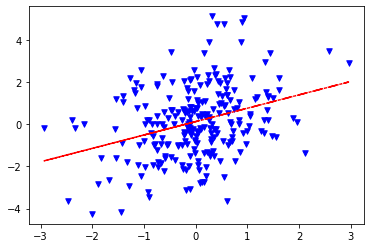

In [107]:
# 자가평가 : 실제값과 예측값 비교
plt.figure()
plt.plot(k_rate, predict, 'r-.')
plt.scatter(k_rate, h_rate, c='blue', s=30, marker='v')
plt.show()
plt.close()

In [105]:
print('기울기:', model.coef_)
print('절편:', model.intercept_)
print('결정계수:', model.score(k_rate, h_rate))

기울기: [0.63482159]
절편: 0.1262845347316865
결정계수: 0.1064571423759525


기울기: [1.00132771]
절편: -0.035001432281775026
결정계수: 0.2644483831226938


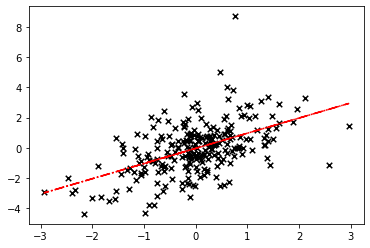

In [109]:
# k_rate , s_rate간 회귀분석
plt.scatter(k_rate, s_rate, c='black', s=30, marker='x')

model= linear_model.LinearRegression()
model.fit(k_rate, s_rate)
predict = model.predict(k_rate)

plt.plot(k_rate, predict, 'r-.', label='s_stock')

print('기울기:', model.coef_)
print('절편:', model.intercept_)
print('결정계수:', model.score(k_rate, s_rate))

# 2. 당뇨병 데이터 회귀분석

## 1. 데이터 불러오기

In [112]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
# 당뇨병 환자 데이터
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [115]:
print(diabetes.data.shape)

(442, 10)


In [117]:
print(diabetes.target.shape)

(442,)


In [123]:
# 2번쨰 col을 변수로 선택 (BMI)
diabetes_X = diabetes.data[:,2].reshape(-1,1)
target = diabetes.target

train_x, test_x = diabetes_X[:-20], diabetes_X[-20:]
train_y, test_y = target[:-20], target[-20:]

## 2. 모델생성 및 검증

In [124]:
lr = linear_model.LinearRegression()
lr.fit(train_x, train_y)

LinearRegression()

In [126]:
# 테스트데이터 효율
pred_y = lr.predict(test_x)
print('coef :', lr.coef_)
print('r_square :', r2_score(test_y, pred_y))

coef : [938.23786125]
r_square : 0.47257544798227136


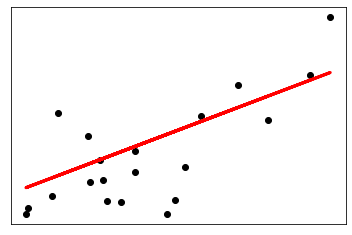

In [128]:
# 학습데이터의 x, y 산포도
plt.scatter(test_x, test_y, c='black')
plt.plot(test_x, pred_y, c='red', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()